In [1]:
%autosave 0

Autosave disabled


In [1]:
# Import the pandas package, then use the "read_csv" function to read
# the labeled training data
import pandas as pd       
train = pd.read_csv("ICHI-corpus2-MOD.tsv", header=0, \
                    delimiter="\t", quoting=2)

In [2]:
train.shape


(105, 2)

In [3]:
train.columns.values

array(['Id', 'Question'], dtype=object)

In [4]:
print (train["Id"][0])

11


In [5]:
print (train["Question"][0])

Sugar free My 90 year old Daddy just got diagnosed, the one thing he loves is Ice cream, can he eat sugar free ice cream?


In [83]:
print (train["Question"][10])

Metformin Advice Please..I am just wondering if anyone knows if you take more than one pill of your usual dose of Metformin can it hurt/affect you in any way? I had my tea but I couldn't remember if I had my Metformin afterwards. Should I take a pill if I'm not sure. or should I just leave it?


In [7]:
# Import BeautifulSoup into your workspace
from bs4 import BeautifulSoup             
import re
import nltk
#nltk.download()  # Download text data sets, including stop words
from nltk.corpus import stopwords # Import the stop word list
#print (stopwords.words("english") )

In [8]:
from nltk.corpus import stopwords # Import the stop word list
#print (stopwords.words("english") )

In [9]:
def question_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, "lxml").get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

In [10]:
clean_question_train = question_to_words( train["Question"][0] )
print (clean_question_train)

sugar free year old daddy got diagnosed one thing loves ice cream eat sugar free ice cream


In [11]:
# Get the number of reviews based on the dataframe column size
num_questions_train = train["Question"].size
print num_questions_train

# Initialize an empty list to hold the clean reviews
#clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
#for i in xrange( 0, num_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    #clean_train_reviews.append( review_to_words( train["review"][i] ) )

105


In [12]:
print ("Cleaning and parsing the training set questions...\n")
clean_train_questions = []

for i in range( 0, num_questions_train ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%10 == 0 ):
        print ("Question from train %d of %d\n" % ( i+1, num_questions_train )  )                                                                  
    clean_train_questions.append( question_to_words( train["Question"][i] ))


Cleaning and parsing the training set questions...

Question from train 10 of 105

Question from train 20 of 105

Question from train 30 of 105

Question from train 40 of 105

Question from train 50 of 105

Question from train 60 of 105

Question from train 70 of 105

Question from train 80 of 105

Question from train 90 of 105

Question from train 100 of 105



In [13]:
print clean_train_questions[20]

new c going battery tests swollen axillary supraclavicular lymph nodes obviously looking cancer ultrasounds chest xray diagnostic mammogram scheduled lymph node removal weeks doctor leave town family emergency contact days great deal stress year also meds panic disorder generalized anxiety surgeon met yesterday said c diabetic right antibiotic see lymph nodes reacting unknown bacterial infection stuff going contribute higher reading fasting bg always normal last checked year ago


In [14]:
print clean_train_questions[0]

sugar free year old daddy got diagnosed one thing loves ice cream eat sugar free ice cream


In [15]:
print "Creating the bag of words for train set...\n"
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 900) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_questions)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()


Creating the bag of words for train set...



In [16]:
print train_data_features.shape


(105L, 900L)


In [17]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
#print vocab

In [18]:
print train_data_features[0]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [19]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
ngram_freq = {}
# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
#    print count, tag
    ngram_freq[tag]=count



In [20]:

import operator
sorted_x = sorted(ngram_freq.items(), key=operator.itemgetter(1),reverse=True)
#print sorted_x
#n_items = take(3,   sorted_x.iteritems())
#print n_items
sorted_x[:10]

[(u'diabetes', 46),
 (u'sugar', 43),
 (u'metformin', 38),
 (u'type', 36),
 (u'blood', 34),
 (u'anyone', 33),
 (u'diabetic', 30),
 (u'eat', 26),
 (u'take', 23),
 (u'know', 22)]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def visualize_word_freq(input_data,max_words):
    """ 
    Input data should be a list of docs.
    Each doc is represented by one whole string (with preprocessing, eg.remove markups)    
    """
    # Plot configuration
    plt.style.use("ggplot")
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['figure.figsize'] = (20.0, 5.0)
    plt.rcParams['xtick.labelsize'] = 22
    
    vectorizer = CountVectorizer(max_features=max_words)
    TITLE = "MOST Freq Words"
        
    mat = vectorizer.fit_transform(input_data)
    
    pd.DataFrame(np.sum(mat,axis=0).T,
             index=vectorizer.get_feature_names(),
             columns=['freq']).sort_values(by='freq',
                                           ascending=False).plot(kind='bar',title=TITLE)

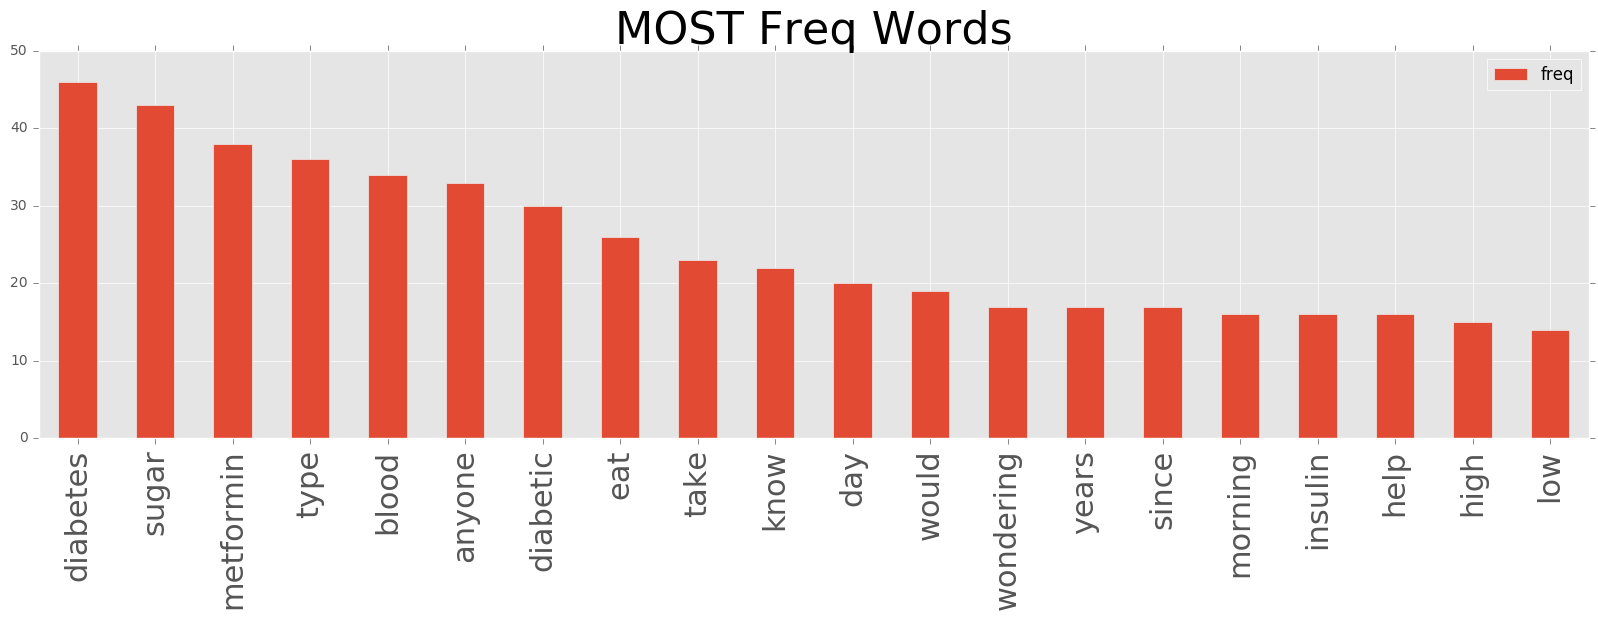

In [22]:
%matplotlib inline
visualize_word_freq(clean_train_questions,20)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
print("Creating the tf/idf...\n")
# Initialize the "TfidfVectorizer" object, which is scikit-learn's tf/idf tool.
"""
tfidf_vectorizer = TfidfVectorizer(max_df=1, \
                                   max_features=20, \
                                   min_df=1, \
                                   stop_words=None, \
                                   use_idf=True, \
                                   tokenizer=None, \
                                   ngram_range=(1,1)) 

"""

"""
CALCULA EL IF-tdf DE ACUERDO A LA EXPRESION 
morm (tf * LOGN(dT+1/dt+1)+1)
"""


tfidf_vectorizer = TfidfVectorizer(max_features=900)
# Tf-idf-weighted term-document sparse matrix 

tfidf_train_data_features = tfidf_vectorizer.fit_transform(clean_train_questions)




# Convert the result to nampy array 

tfidf_train_data_features_array= tfidf_train_data_features.toarray() 

print(tfidf_train_data_features_array.shape)
vocab = tfidf_vectorizer.get_feature_names()
#print vocab


Creating the tf/idf...

(105L, 900L)


In [103]:
#print train_data_features

In [104]:
#tfidf_train_data_features.A[0]

In [105]:
#check for sanity
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_train_data_features[0:1], tfidf_train_data_features[0:105]).flatten()
cosine_similarities

array([ 1.        ,  0.        ,  0.        ,  0.03673628,  0.05018691,
        0.04009377,  0.        ,  0.        ,  0.        ,  0.        ,
        0.03174107,  0.        ,  0.07202018,  0.02199356,  0.07105799,
        0.        ,  0.        ,  0.05094452,  0.03453765,  0.        ,
        0.02483711,  0.        ,  0.01772247,  0.        ,  0.04209686,
        0.07943853,  0.        ,  0.03513058,  0.        ,  0.        ,
        0.01019913,  0.09545637,  0.02195643,  0.04215165,  0.        ,
        0.        ,  0.        ,  0.01875223,  0.        ,  0.        ,
        0.07986977,  0.28246932,  0.01923789,  0.01844407,  0.        ,
        0.        ,  0.08554566,  0.        ,  0.11522225,  0.        ,
        0.        ,  0.        ,  0.05619191,  0.07441536,  0.248932  ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0497615 ,  0.        ,  0.0660735 ,  0.07404125,  0.03812501,
        0.03350976,  0.21792006,  0.        ,  0.01939934,  0.  

In [106]:
related_indices = cosine_similarities.argsort()[:-6:-1]
related_indices


array([ 0, 41, 54, 94, 66], dtype=int64)

In [107]:
print (train["Id"][related_indices])

0      11
41    137
54    152
94    193
66    165
Name: Id, dtype: int64


In [108]:
cosine_similarities[related_indices]

array([ 1.        ,  0.28246932,  0.248932  ,  0.23802954,  0.21792006])

In [109]:
#compare questions with train and re-checl the index
cosine_similarities = linear_kernel(tfidf_train_data_features[0:1], tfidf_train_data_features[10:105]).flatten()
#cosine_similarities
related_indices = cosine_similarities.argsort()[:-5:-1]
print related_indices+10
print (train["Id"][related_indices+10])
cosine_similarities[related_indices]


[41 54 94 66]
41    137
54    152
94    193
66    165
Name: Id, dtype: int64


array([ 0.28246932,  0.248932  ,  0.23802954,  0.21792006])

In [111]:
# compute all
for i in range(0,10):
    cosine_similarities = linear_kernel(tfidf_train_data_features[i:i+1], tfidf_train_data_features).flatten()
#cosine_similarities
    related_indices = cosine_similarities.argsort()[:-5:-1]
    #related_indices
    print (train["Id"][related_indices])
    print cosine_similarities[related_indices]
    print

0      11
41    137
54    152
94    193
Name: Id, dtype: int64
[ 1.          0.28246932  0.248932    0.23802954]

1       12
32     127
68     167
103    203
Name: Id, dtype: int64
[ 1.          0.3810436   0.14497921  0.10717328]

2       13
56     154
30     125
101    200
Name: Id, dtype: int64
[ 1.          0.17822766  0.16342329  0.14547338]

3      14
12    103
65    164
4      15
Name: Id, dtype: int64
[ 1.          0.34284112  0.13918243  0.13656304]

4      15
19    113
63    162
80    179
Name: Id, dtype: int64
[ 1.          0.32002504  0.28523738  0.25287308]

5      16
93    192
46    142
4      15
Name: Id, dtype: int64
[ 1.          0.28932099  0.1895357   0.177798  ]

6      17
45    141
95    194
69    168
Name: Id, dtype: int64
[ 1.          0.23340948  0.19994945  0.08422142]

7      18
58    156
46    142
18    112
Name: Id, dtype: int64
[ 1.          0.20230752  0.16199446  0.13169271]

8      19
34    129
58    156
49    146
Name: Id, dtype: int64
[ 1.          0.1

In [112]:
# compute all
for i in range(0,10):
    cosine_similarities = linear_kernel(tfidf_train_data_features[i:i+1], tfidf_train_data_features[10:105]).flatten()
#cosine_similarities
    related_indices = cosine_similarities.argsort()[:-5:-1]
    related_indices+10
    print (train["Id"][related_indices+10])
    print cosine_similarities[related_indices]
    print

41    137
54    152
94    193
66    165
Name: Id, dtype: int64
[ 0.28246932  0.248932    0.23802954  0.21792006]

32     127
68     167
103    203
14     105
Name: Id, dtype: int64
[ 0.3810436   0.14497921  0.10717328  0.10589828]

56     154
30     125
101    200
79     178
Name: Id, dtype: int64
[ 0.17822766  0.16342329  0.14547338  0.13023331]

12    103
65    164
80    179
26    121
Name: Id, dtype: int64
[ 0.34284112  0.13918243  0.13221589  0.11284506]

19    113
63    162
80    179
51    149
Name: Id, dtype: int64
[ 0.32002504  0.28523738  0.25287308  0.24745405]

93    192
46    142
99    198
19    113
Name: Id, dtype: int64
[ 0.28932099  0.1895357   0.15652844  0.15436409]

45     141
95     194
69     168
104    204
Name: Id, dtype: int64
[ 0.23340948  0.19994945  0.08422142  0.07784399]

58     156
46     142
18     112
102    202
Name: Id, dtype: int64
[ 0.20230752  0.16199446  0.13169271  0.10636545]

34    129
58    156
49    146
87    186
Name: Id, dtype: int64
[ 0.19691

In [49]:
import numpy
scores = (tfidf_train_data_features[0, :] * tfidf_train_data_features[0:, :].T).A[0]
print scores
best_score = np.argmax(scores)
answer = clean_train_questions[best_score]
print answer

[ 1.          0.          0.          0.03673628  0.05018691  0.04009377
  0.          0.          0.          0.          0.03174107  0.
  0.07202018  0.02199356  0.07105799  0.          0.          0.05094452
  0.03453765  0.          0.02483711  0.          0.01772247  0.
  0.04209686  0.07943853  0.          0.03513058  0.          0.
  0.01019913  0.09545637  0.02195643  0.04215165  0.          0.          0.
  0.01875223  0.          0.          0.07986977  0.28246932  0.01923789
  0.01844407  0.          0.          0.08554566  0.          0.11522225
  0.          0.          0.          0.05619191  0.07441536  0.248932    0.
  0.          0.          0.          0.          0.0497615   0.          0.0660735
  0.07404125  0.03812501  0.03350976  0.21792006  0.          0.01939934
  0.          0.03267464  0.          0.05592471  0.          0.
  0.06335997  0.04544036  0.          0.          0.04086871  0.09941446
  0.12628352  0.          0.          0.01719967  0.          0.